In [2]:
!nvidia-smi

Fri May 17 06:19:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
pip install ultralytics==8.0.196

In [5]:
from IPython import display
display.clear_output()

In [6]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cParrTvId0A3DTc8Dwcr")
project = rf.workspace("cvpr-p1qop").project("vehicle-detection-sgcvr")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=160 imgsz=600 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Vehicle-Detection-1/data.yaml, epochs=160, patience=50, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fal

In [10]:
!ls {HOME}/runs/detect/train2/

args.yaml					     P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			     PR_curve.png      val_batch0_labels.jpg
confusion_matrix.png				     R_curve.png       val_batch0_pred.jpg
events.out.tfevents.1715926812.6bdfadcb3936.11087.0  results.csv       val_batch1_labels.jpg
F1_curve.png					     results.png       val_batch1_pred.jpg
labels_correlogram.jpg				     train_batch0.jpg  weights
labels.jpg					     train_batch1.jpg


/content


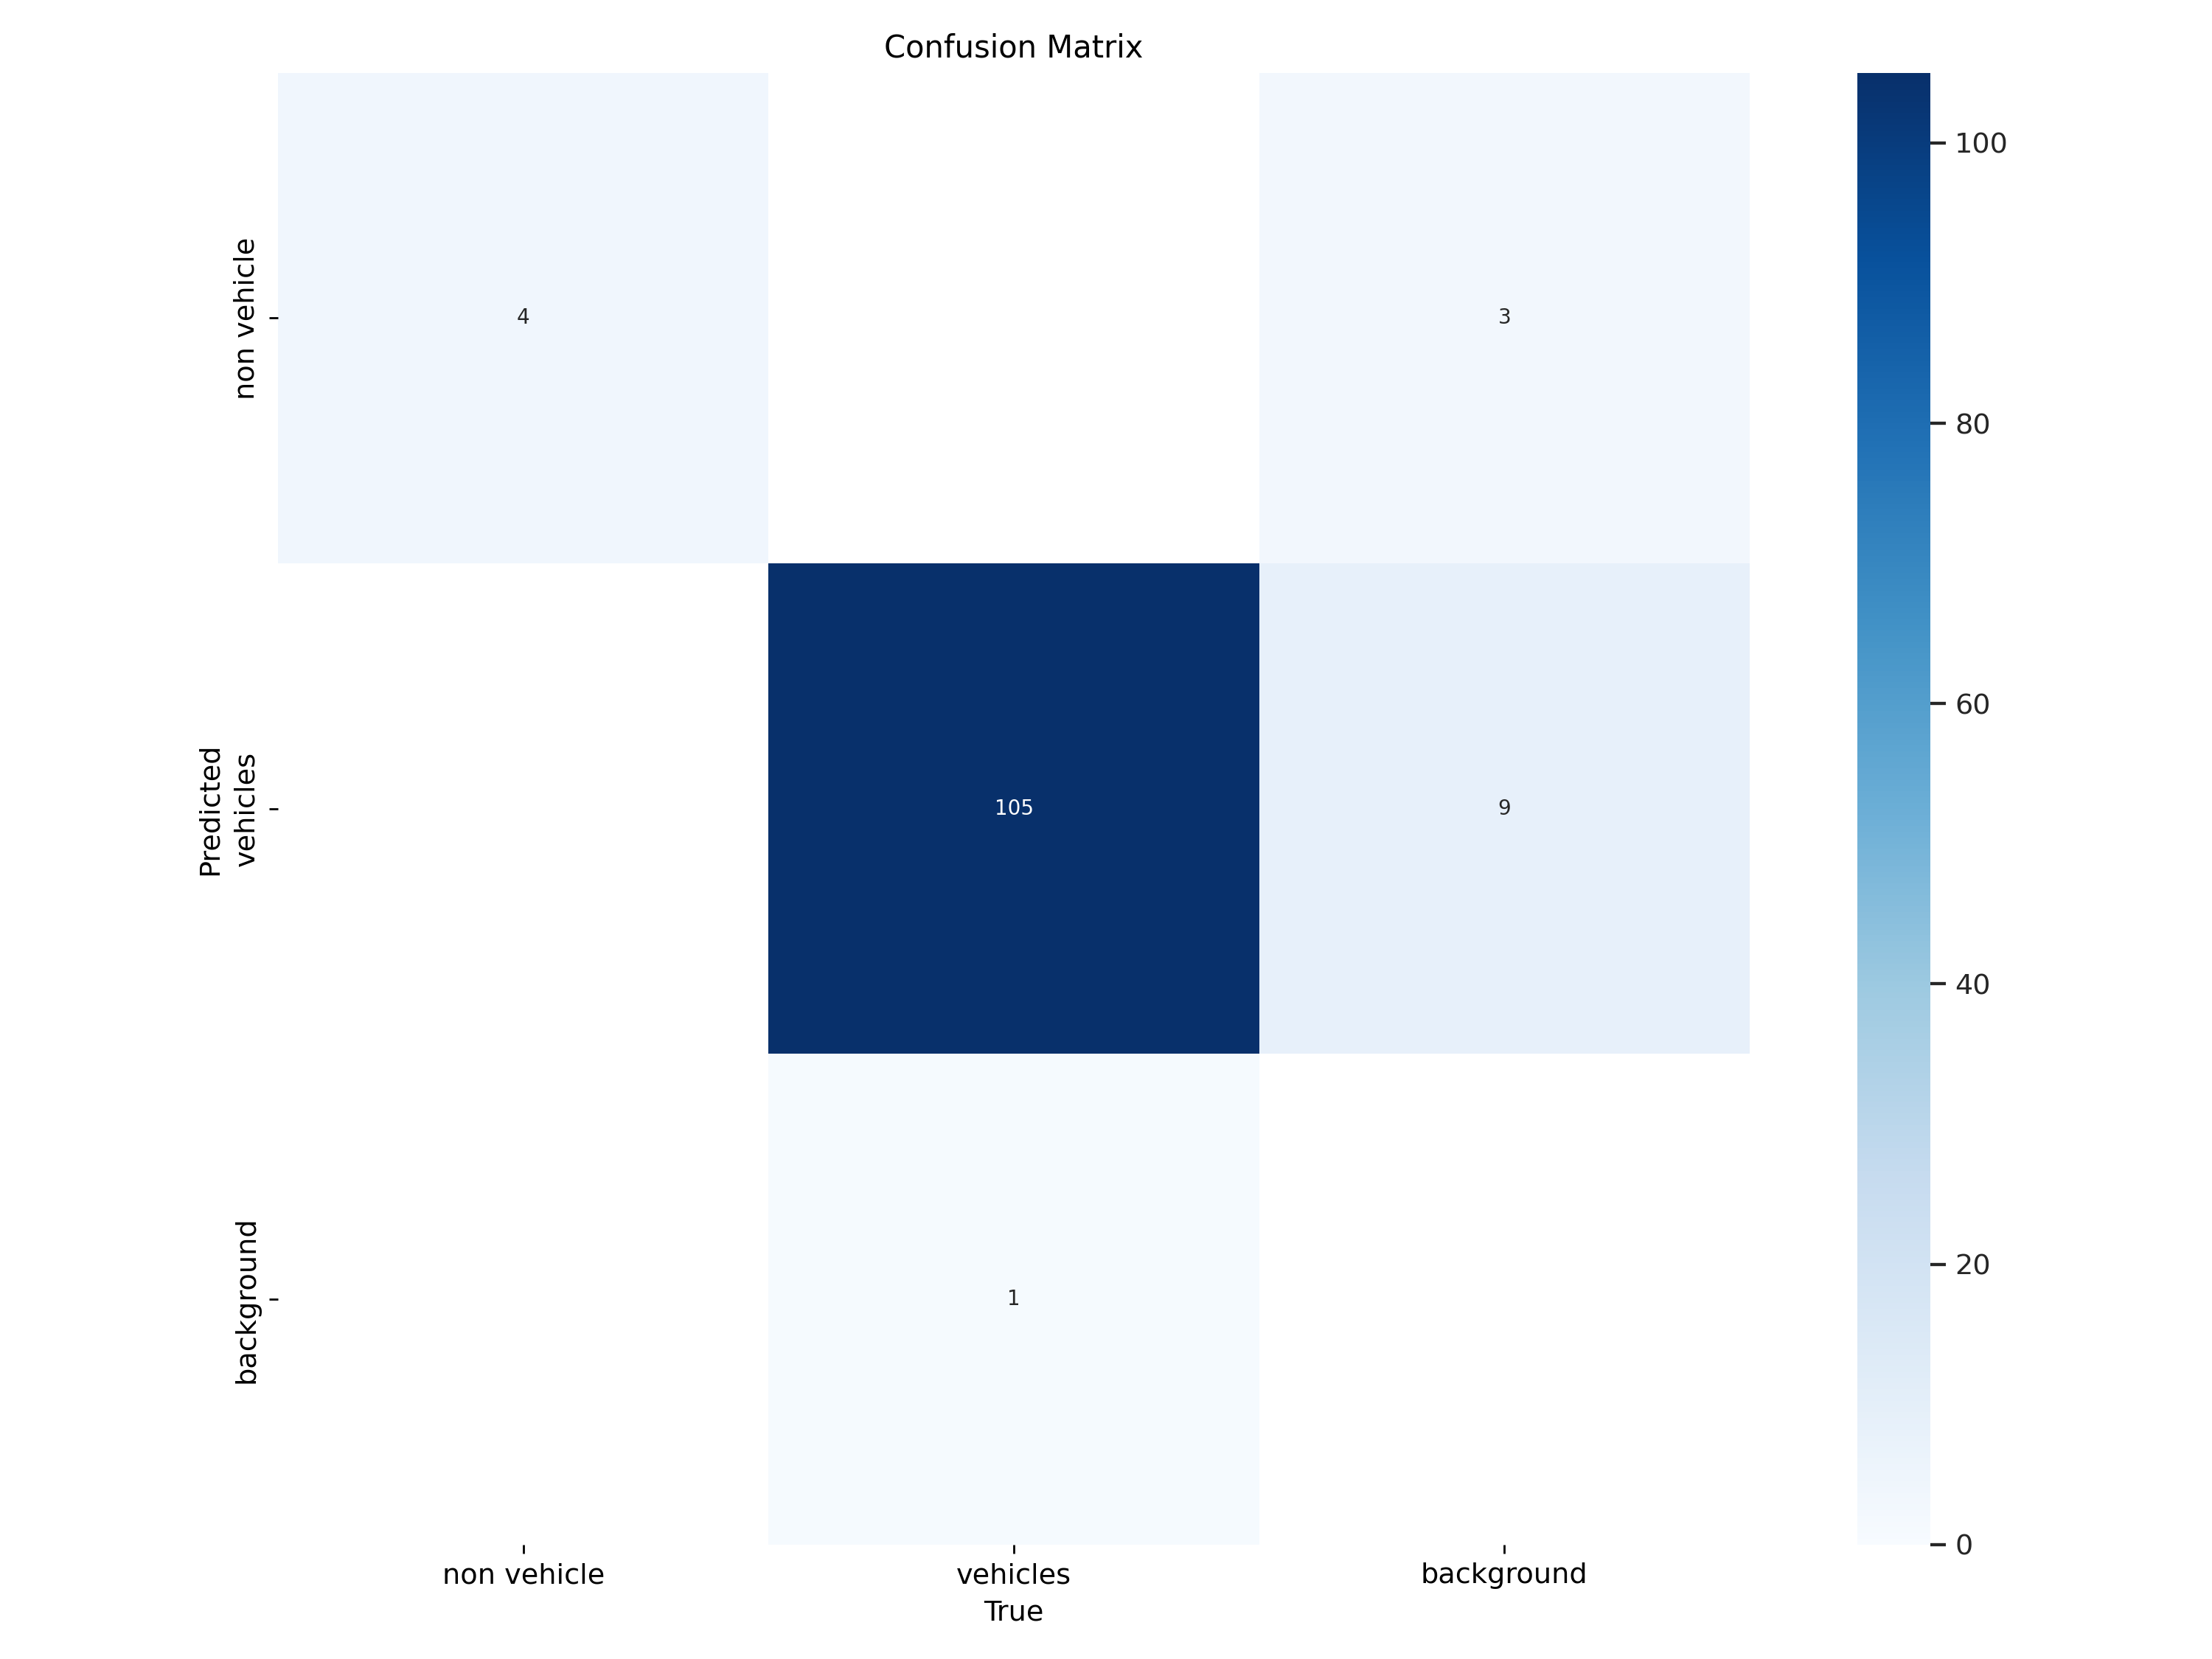

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


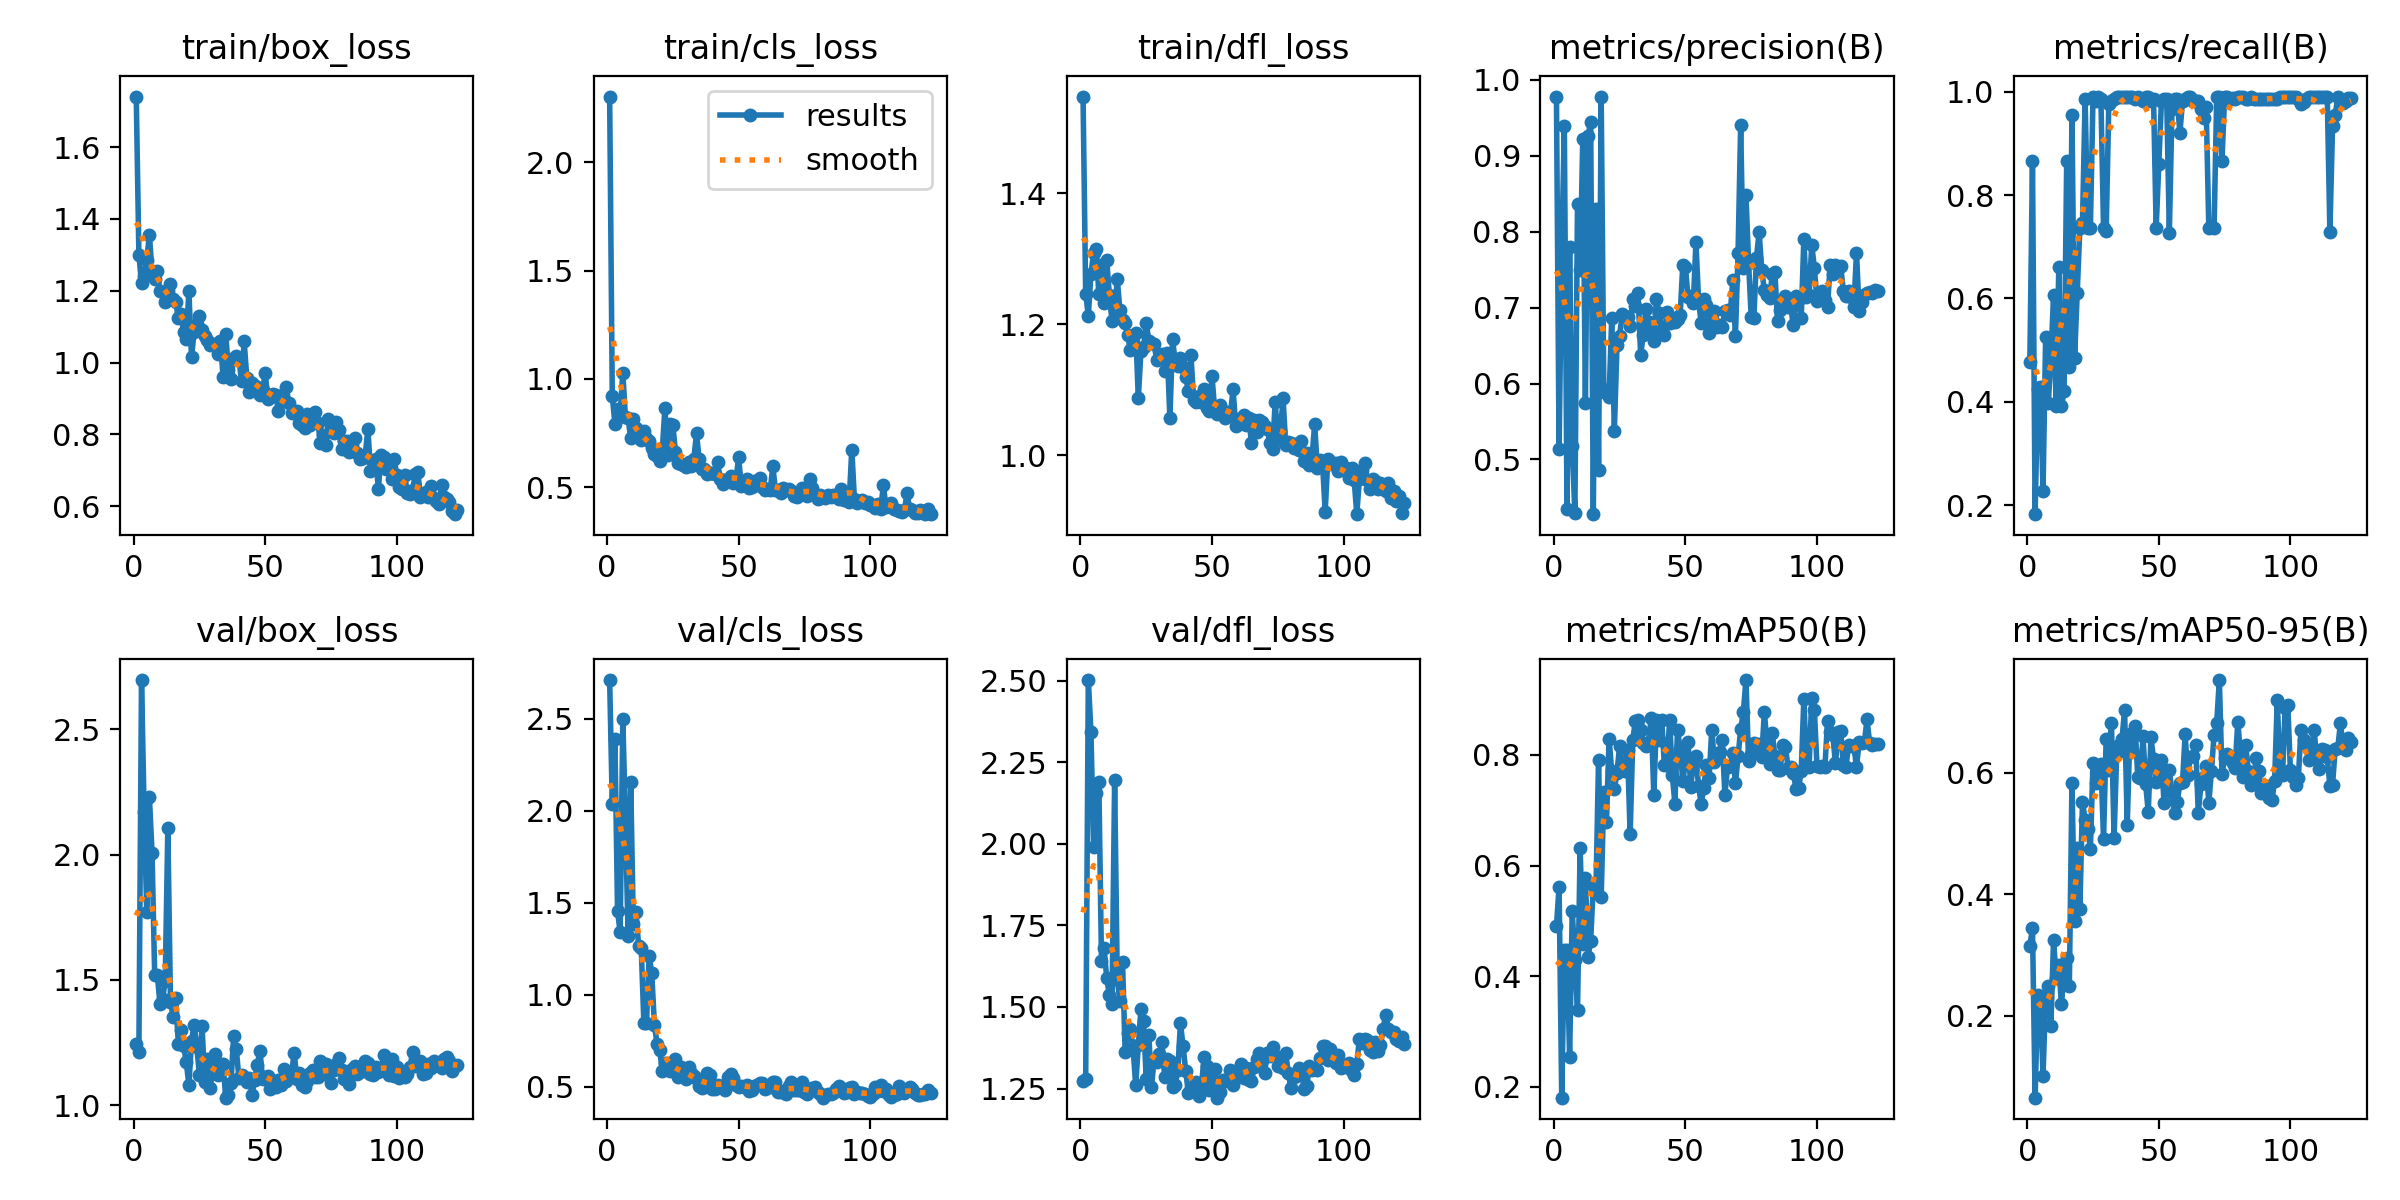

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


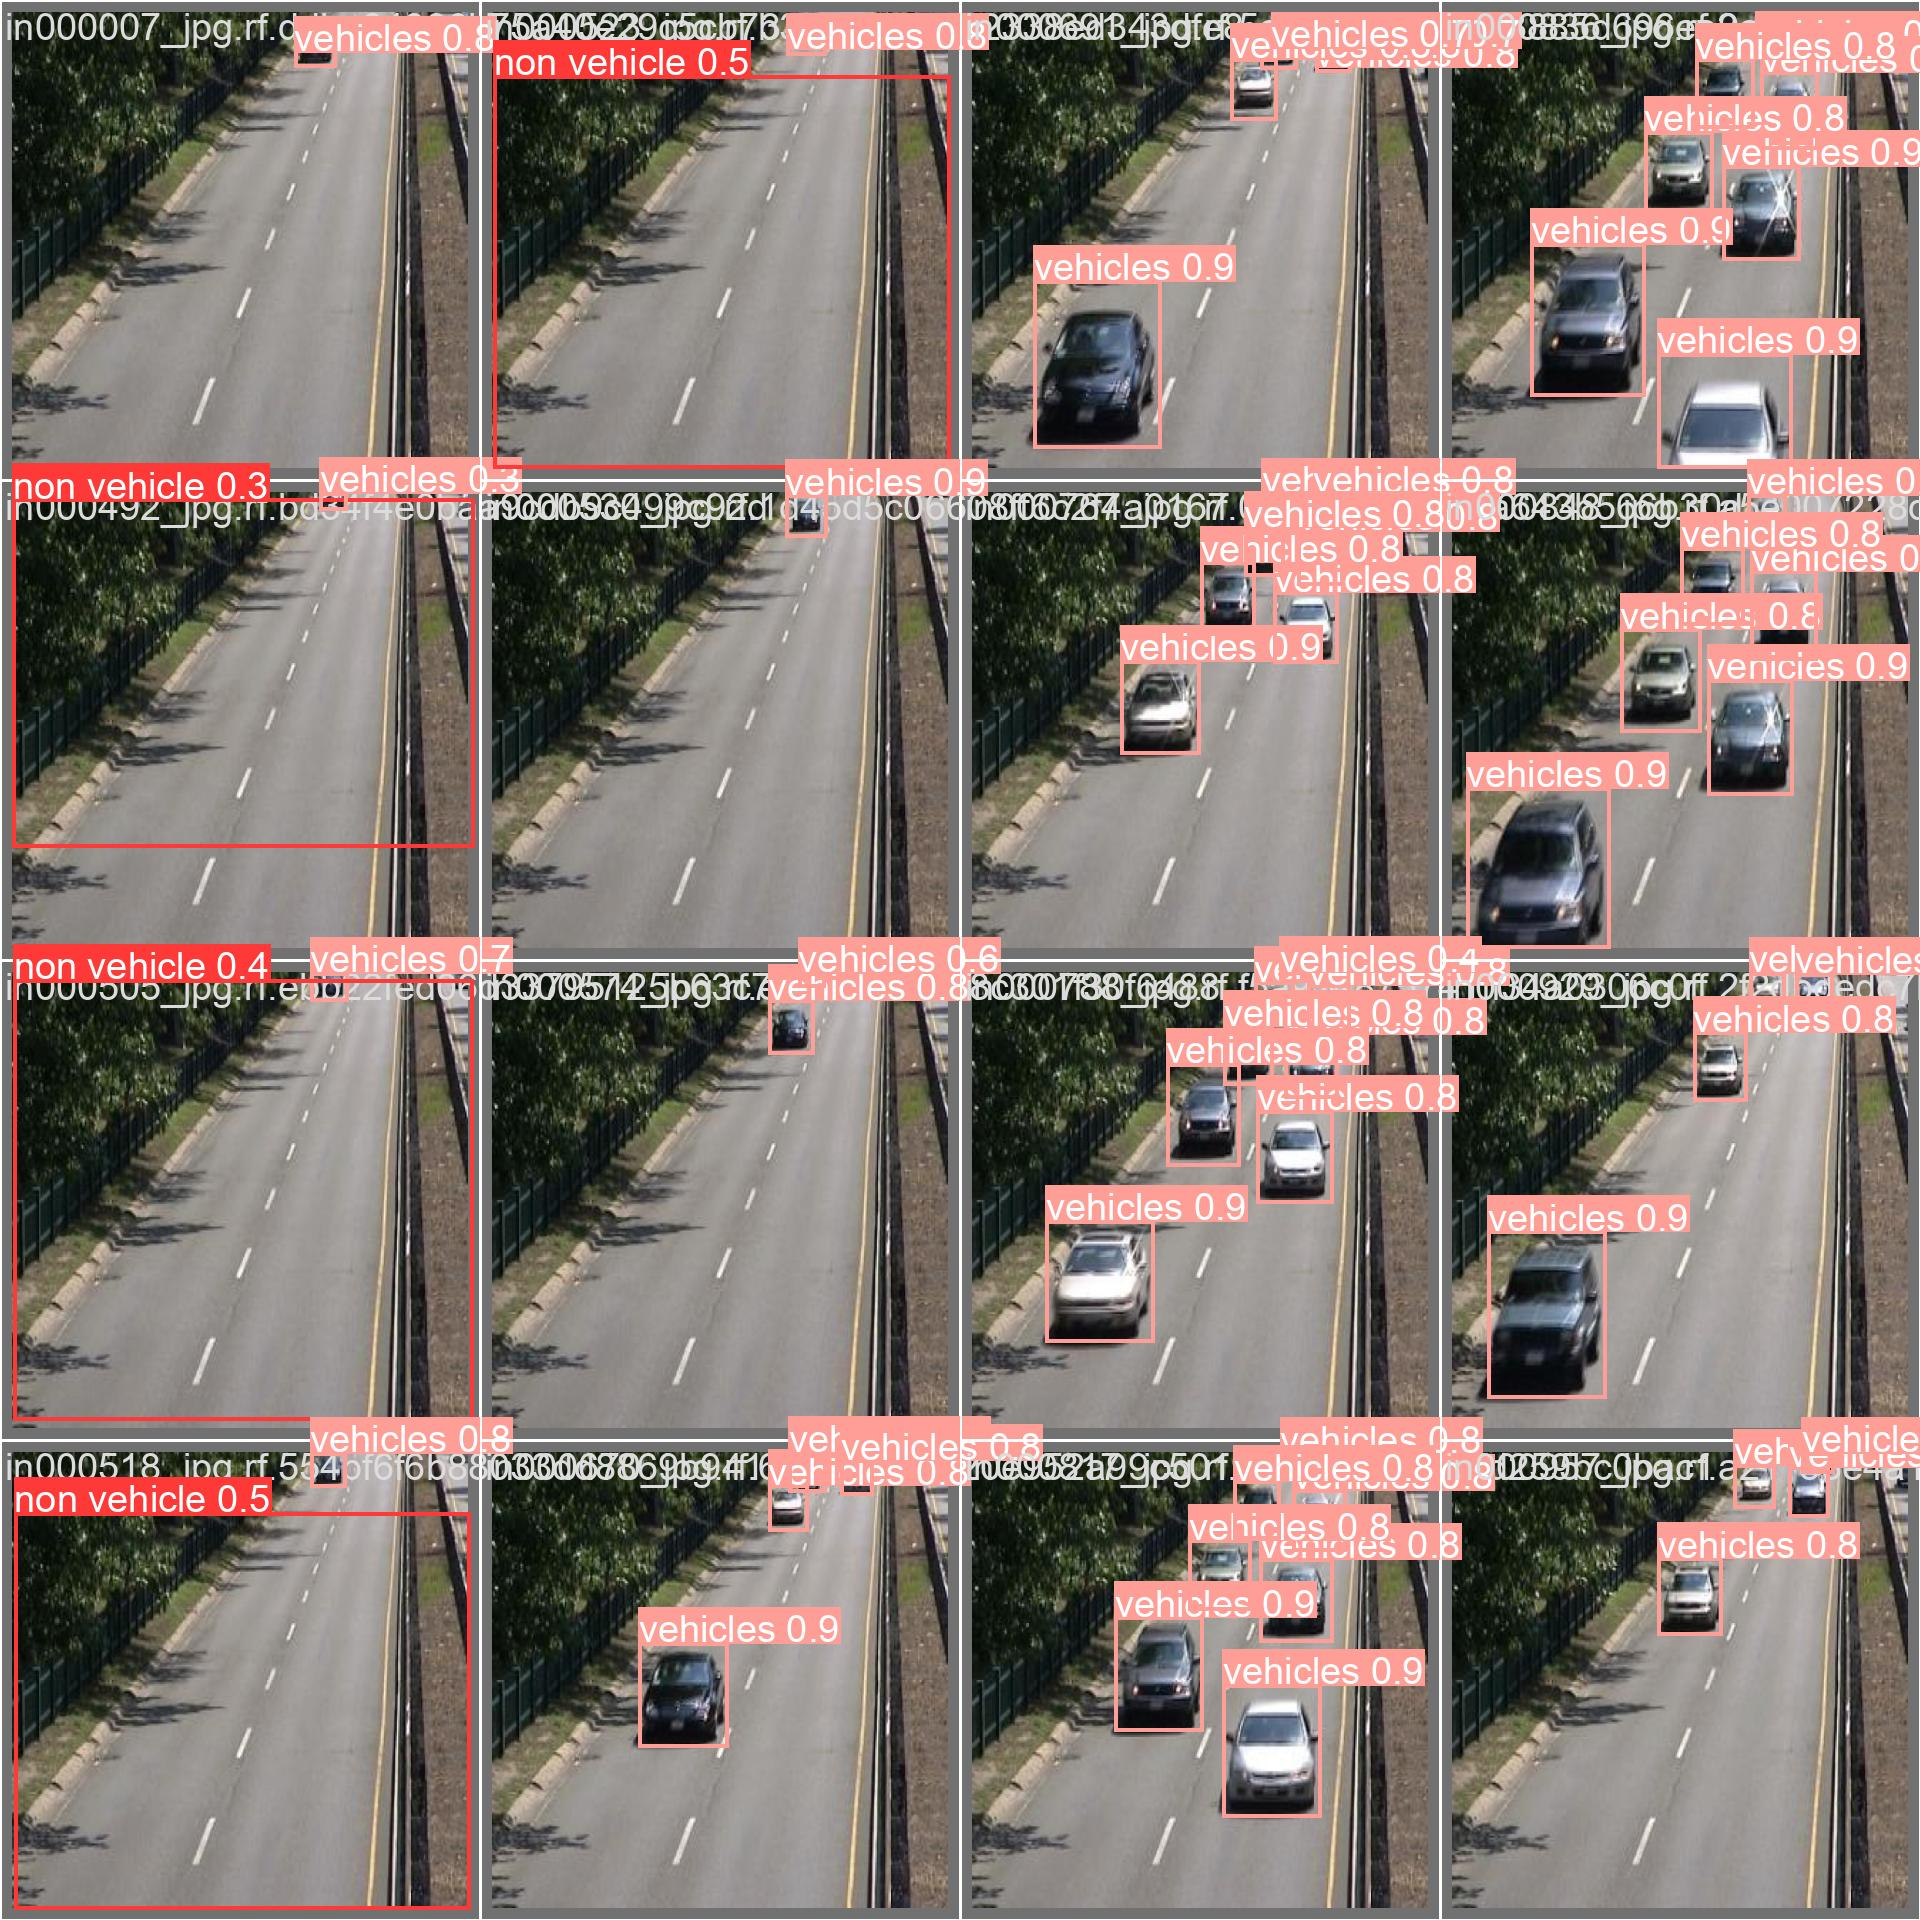

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Vehicle-Detection-1/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100% 41/41 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.31s/it]
                   all         41        110      0.849      0.991      0.935      0.752
           non vehicle         41          4      0.747          1      0.895      0.857
              vehicles         41        106      0.951      0.981      0.975      0.648
Speed: 9.3ms preprocess, 31.6ms inference, 0.0ms loss, 21.5ms postpro

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/21 /content/Vehicle-Detection-1/test/images/in000008_jpg.rf.71de5cc8fa8eedea5ce60395a9c01f9f.jpg: 608x608 1 vehicles, 16.1ms
image 2/21 /content/Vehicle-Detection-1/test/images/in000020_jpg.rf.9e3efde155accf10a3d6b67b4446df11.jpg: 608x608 1 vehicles, 16.2ms
image 3/21 /content/Vehicle-Detection-1/test/images/in000278_jpg.rf.f0147f99a922a7e7264daff642f0998c.jpg: 608x608 4 vehicless, 16.1ms
image 4/21 /content/Vehicle-Detection-1/test/images/in000301_jpg.rf.00b50830309f173e4e439fb8afd7cf1e.jpg: 608x608 4 vehicless, 16.1ms
image 5/21 /content/Vehicle-Detection-1/test/images/in000305_jpg.rf.3b23830f321de334a2a8b6f968184629.jpg: 608x608 3 vehicless, 16.2ms
image 6/21 /content/Vehicle-Detection-1/test/images/in000354_jpg.rf.0ca8f0813239277d7dee9dd235362041.jpg: 608x608 2 vehicless, 16.1ms
image 7/21 /content

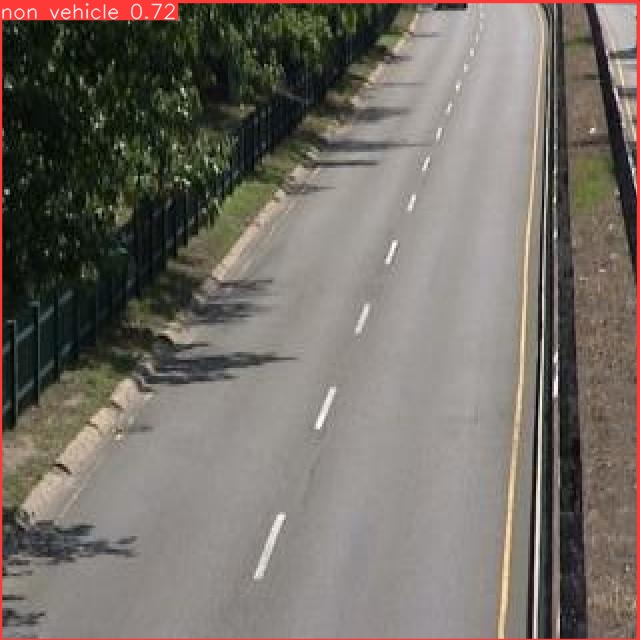

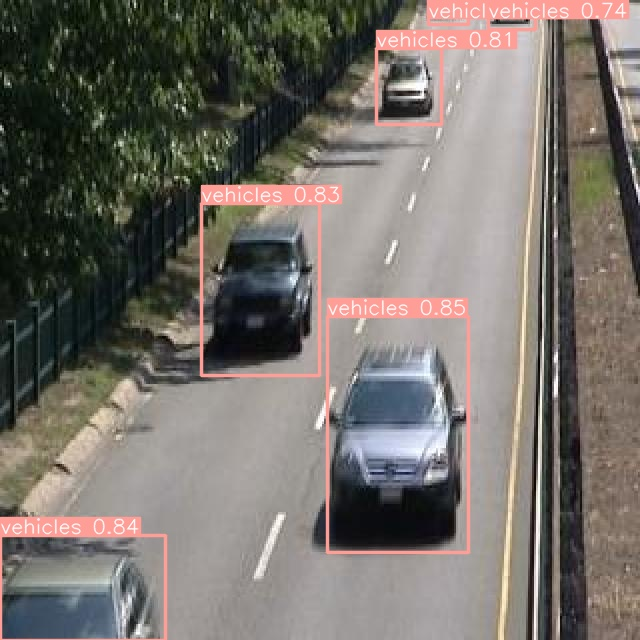

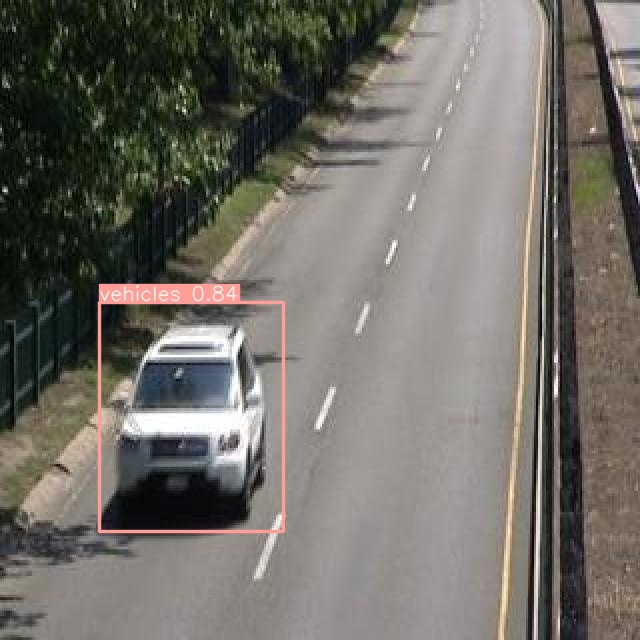

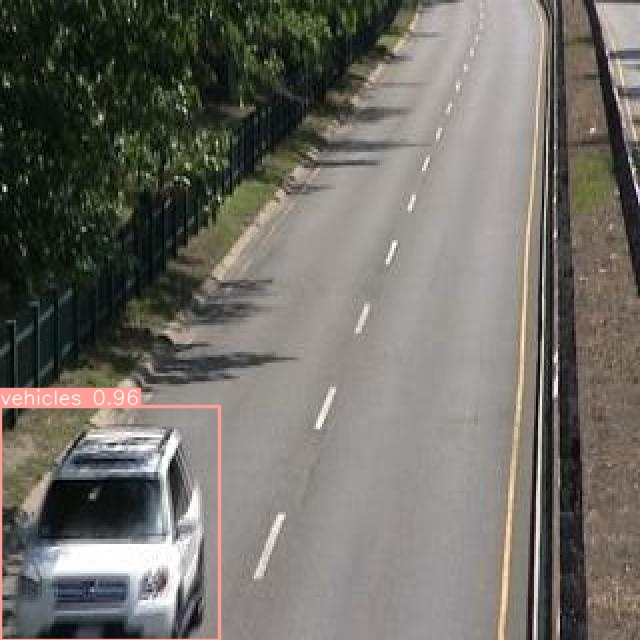

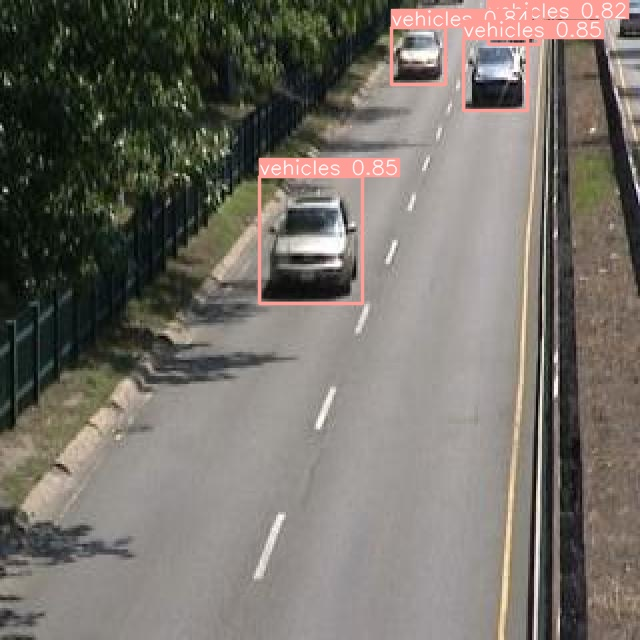

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [18]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/carvideo.mp4 save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/716) /content/carvideo.mp4: 352x608 3 vehicless, 219.8ms
video 1/1 (2/716) /content/carvideo.mp4: 352x608 2 vehicless, 10.8ms
video 1/1 (3/716) /content/carvideo.mp4: 352x608 2 vehicless, 10.6ms
video 1/1 (4/716) /content/carvideo.mp4: 352x608 2 vehicless, 10.6ms
video 1/1 (5/716) /content/carvideo.mp4: 352x608 2 vehicless, 10.6ms
video 1/1 (6/716) /content/carvideo.mp4: 352x608 2 vehicless, 11.5ms
video 1/1 (7/716) /content/carvideo.mp4: 352x608 2 vehicless, 10.7ms
video 1/1 (8/716) /content/carvideo.mp4: 352x608 2 vehicless, 10.6ms
video 1/1 (9/716) /content/carvideo.mp4: 352x608 2 vehicless, 10.6ms
video 1/1 (10/716) /content/carvideo.mp4: 352x608 2 vehicless, 10.6ms
video 1/1 (11/716) /content/carvideo.mp4: 352x608 3 vehicless, 10.6ms
video 1/1 (12/716) /conten